In [1]:
!python --version

Python 3.11.5


In [2]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt 
import matplotlib.cm

import statistics as stat
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import random
from itertools import *
try:
    import itertools.izip as zip
except ImportError:
    import itertools

/usr/local/lib/python3.9/site-packages/pandas/core/computation/expressions.py:21: UserWarning: Pandas requires version '2.8.4' or newer of 'numexpr' (version '2.7.3' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED


In [3]:
df = pd.read_csv("./LiteraturePayoffMatrices-All.csv")
df_2 = pd.read_csv("./LiteraturePayoffMatrices-All.csv")

In [40]:
df["paper"] = np.where(df['Paper']=='Faroukkian2020','Farrokhian2020',df['Paper']) 
df["paper"] = np.where(df['Paper']=='Maltas2023','Maltas2024',df['Paper']) 

df["paper"] = pd.Categorical(df["paper"])

In [5]:
df = df.query('A.notnull()')
df = df.query('paper != "Freischel2021"')
df = df.query('paper != "Chao"')
df["S"] = [float(i) for i in df["S"]]
df["a_mw"] = [float(i) for i in df["a_mw"]]
df["a_wm"] = [float(i) for i in df["a_wm"]]
df["amw_s"] = [float(i) for i in df["amw_s"]]
df["awm_s"] = [float(i) for i in df["awm_s"]]

df['Ap']= [float(i) for i in df["Ap"]]
df['Bp']= [float(i) for i in df["Bp"]]
df['Cp']= [float(i) for i in df["Cp"]]
df['Dp']= [float(i) for i in df["Dp"]]



In [41]:
#paper_dict = {'Kaznatcheev2019':'green', 'Maltas2023':'orange', 'Freischel2021':u'purple', 'Farrokhian2022':u'magenta', 'CaiChan2020':'brown',"VulicKolter2001":u"gray", "Li2015":u"cyan" , "Deris2023":u"blue" , "Adamowicz2020":u"lime"}
paper_dict = {'Kaznatcheev2019':'green', 'Maltas2024':'orange', 'Farrokhian2022':u'magenta', 'CaiChan2020':'brown',"VulicKolter2001":u"gray", "Li2015":u"cyan" , "Deris2023":u"blue" , "Adamowicz2020":u"lime"}
scott_dict={'Maltas2024':'orange', 'Farrokhian2022':u'magenta'}
col_paper = list()
cols_S = list()



for i in df['paper']:
    if i in paper_dict.keys(): 
        col_paper.append(paper_dict[i])
    else:
        col_paper.append("black")


for i in df['S']:
    if i>0:
        cols_S.append("blue")
    else:
        cols_S.append("green")
    

In [42]:
df['col_paper'] =col_paper 
df["color_S"]=cols_S
df['C-A'] = df['C']-df['A']
df['B-D'] = df['B']-df['D']

df['c-a'] = df["Cp"]-df["Ap"]
df['b-d'] = df["Bp"]-df["Dp"]


In [43]:
df=df.query('Condition != "Cancer-Average"')

In [44]:
ID=[str(i) for i in list(df.index)]
df['ID'] = ID
ID_markers=['5','6','7','8',
            '',' ',' ',' ',
            '0','1','2','3','4',
            '','', 
            '',' ',
            '',' ',' ',' ',' ',' ',' ',' ',' ',' ',
            '','','']
scott_markers=['o','+','v','<','*','^','n','s','p']
df['ID_markers'] = ID_markers

In [45]:
mks = [fr'${i}$' for i in df["ID_markers"]]
lst=[]
for j in mks:
    if (j=='$$' or j=='$ $'):
        lst.append(r'$\bullet$')
    else:
        lst.append(j)
        
df["ID_markers"]=lst
lst
        

['$5$',
 '$6$',
 '$7$',
 '$8$',
 '$\\bullet$',
 '$\\bullet$',
 '$\\bullet$',
 '$\\bullet$',
 '$0$',
 '$1$',
 '$2$',
 '$3$',
 '$4$',
 '$\\bullet$',
 '$\\bullet$',
 '$\\bullet$',
 '$\\bullet$',
 '$\\bullet$',
 '$\\bullet$',
 '$\\bullet$',
 '$\\bullet$',
 '$\\bullet$',
 '$\\bullet$',
 '$\\bullet$',
 '$\\bullet$',
 '$\\bullet$',
 '$\\bullet$',
 '$\\bullet$',
 '$\\bullet$',
 '$\\bullet$']

In [48]:
scott_df = df.query('paper in ["Maltas2024","Farrokhian2022"]')


In [49]:
scott_df

,Lab,Paper,Condition,A,B,C,D,Ap,Bp,Cp,...,Include,paper,col_paper,color_S,C-A,B-D,c-a,b-d,ID,ID_markers
4,Scott,Maltas2023,PC9vEvolved,1.0000,0.970,0.970,0.8400,1.0,0.9700,0.9700,...,Y,Maltas2024,orange,green,-0.0300,0.1300,-0.0300,0.1300,4,$\bullet$
5,Scott,Maltas2023,PC9vKRAS,1.0300,0.990,1.010,0.9300,1.0,0.9612,0.9806,...,Y,Maltas2024,orange,green,-0.0200,0.0600,-0.0194,0.0583,5,$\bullet$
6,Scott,Maltas2023,PC9vPIK3CA,1.0000,1.020,0.950,0.8800,1.0,1.0200,0.9500,...,Y,Maltas2024,orange,green,-0.0500,0.1400,-0.0500,0.1400,6,$\bullet$
7,Scott,Maltas2023,PC9vBRAF,1.0100,1.010,0.980,0.9000,1.0,1.0000,0.9703,...,Y,Maltas2024,orange,green,-0.0300,0.1100,-0.0297,0.1089,7,$\bullet$
8,Scott,Farrokhian2022,Parental v Res,0.9963,1.004,0.975,0.7517,1.0,1.0077,0.9786,...,Y,Farrokhian2022,magenta,green,-0.0213,0.2523,-0.0214,0.2532,8,$0$
9,Scott,Farrokhian2022,PvR 0.25um,0.4700,0.420,0.830,0.7000,1.0,0.8936,1.7660,...,Y,Farrokhian2022,magenta,blue,0.3600,-0.2800,0.7660,-0.5958,9,$1$
10,Scott,Farrokhian2022,PvR 0.5um,0.3770,-0.010,0.860,0.7140,1.0,-0.0100,2.2812,...,Y,Farrokhian2022,magenta,blue,0.4830,-0.7240,1.2812,-1.9039,10,$2$
11,Scott,Farrokhian2022,PvR 1um,0.3700,-0.430,0.930,0.7280,1.0,-1.1622,2.5135,...,Y,Farrokhian2022,magenta,blue,0.5600,-1.1580,1.5135,-3.1298,11,$3$
12,Scott,Farrokhian2022,PvR 4um,0.3300,-0.590,1.120,0.7890,1.0,-1.7879,3.3939,...,Y,Farrokhian2022,magenta,blue,0.7900,-1.3790,2.3939,-4.1788,12,$4$


In [13]:
scott_df

,Lab,Paper,Condition,A,B,C,D,Ap,Bp,Cp,...,Include,paper,col_paper,color_S,C-A,B-D,c-a,b-d,ID,ID_markers
4,Scott,Maltas2023,PC9vEvolved,1.0000,0.970,0.970,0.8400,1.0,0.9700,0.9700,...,Y,Maltas2023,orange,green,-0.0300,0.1300,-0.0300,0.1300,4,$\bullet$
5,Scott,Maltas2023,PC9vKRAS,1.0300,0.990,1.010,0.9300,1.0,0.9612,0.9806,...,Y,Maltas2023,orange,green,-0.0200,0.0600,-0.0194,0.0583,5,$\bullet$
6,Scott,Maltas2023,PC9vPIK3CA,1.0000,1.020,0.950,0.8800,1.0,1.0200,0.9500,...,Y,Maltas2023,orange,green,-0.0500,0.1400,-0.0500,0.1400,6,$\bullet$
7,Scott,Maltas2023,PC9vBRAF,1.0100,1.010,0.980,0.9000,1.0,1.0000,0.9703,...,Y,Maltas2023,orange,green,-0.0300,0.1100,-0.0297,0.1089,7,$\bullet$
8,Scott,Farrokhian2022,Parental v Res,0.9963,1.004,0.975,0.7517,1.0,1.0077,0.9786,...,Y,Farrokhian2022,magenta,green,-0.0213,0.2523,-0.0214,0.2532,8,$0$
9,Scott,Farrokhian2022,PvR 0.25um,0.4700,0.420,0.830,0.7000,1.0,0.8936,1.7660,...,Y,Farrokhian2022,magenta,blue,0.3600,-0.2800,0.7660,-0.5958,9,$1$
10,Scott,Farrokhian2022,PvR 0.5um,0.3770,-0.010,0.860,0.7140,1.0,-0.0100,2.2812,...,Y,Farrokhian2022,magenta,blue,0.4830,-0.7240,1.2812,-1.9039,10,$2$
11,Scott,Farrokhian2022,PvR 1um,0.3700,-0.430,0.930,0.7280,1.0,-1.1622,2.5135,...,Y,Farrokhian2022,magenta,blue,0.5600,-1.1580,1.5135,-3.1298,11,$3$
12,Scott,Farrokhian2022,PvR 4um,0.3300,-0.590,1.120,0.7890,1.0,-1.7879,3.3939,...,Y,Farrokhian2022,magenta,blue,0.7900,-1.3790,2.3939,-4.1788,12,$4$


In [50]:
scott_df["col_paper"]

4      orange
5      orange
6      orange
7      orange
8     magenta
9     magenta
10    magenta
11    magenta
12    magenta
Name: col_paper, dtype: object

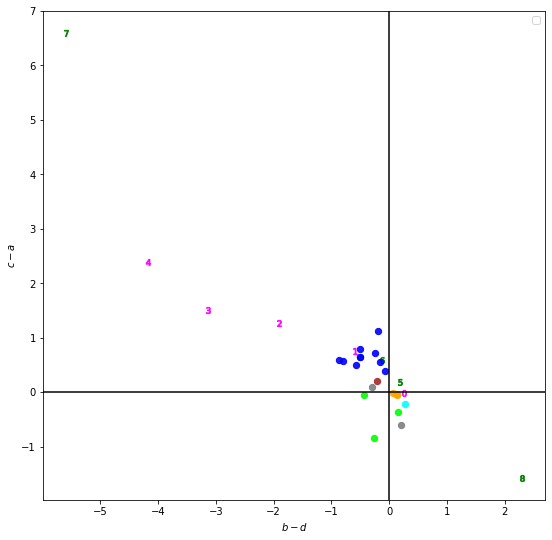

In [51]:

fig, ax = plt.subplots(figsize=(9, 9))

for i in ID:
    row = df.query(f'index=={i}')
    plt.scatter(x=row["b-d"], y=row["c-a"], 
                c=row["col_paper"], marker=f'{row["ID_markers"].to_string(index=False)}', alpha=0.9,s=40)
    #print(row["ID_markers"].to_string(index=False))

markers = [plt.Line2D([0,0],[0,0], marker='^', linestyle='') for ID in scott_df['ID']]
#sns.scatterplot(data=scott_df, x="b-d", y="c-a", col=scott_df["col_paper"], style=scott_df['Condition'], s=100)
#sns.move_legend(ax,bbox_to_anchor=(1, 1.02), loc='upper left')
#plt.legend(numpoints=1)

ax.axhline(0, c='black') ; plt.axvline(0,c='black')
ax.set(xlabel=r"$b-d$", ylabel=r"$c-a$")


markers = [plt.Line2D([0,0],[0,0],color=color, marker='o', linestyle='') for color in scott_dict.values()]

handles, labels = plt.gca().get_legend_handles_labels()
by_label = dict(zip(labels, handles))
plt.legend(by_label.values(), by_label.keys())
#plt.legend(paper_dict.keys(), numpoints=1)
fig.savefig("Scott_ca_bd.png", dpi=200)


ValueError: 0       green
1       green
2       green
3       green
4      orange
5      orange
6      orange
7      orange
8     magenta
9     magenta
10    magenta
11    magenta
12    magenta
13       gray
14       gray
15      brown
17       cyan
18       blue
19       blue
20       blue
21       blue
22       blue
23       blue
24       blue
25       blue
26       blue
27       blue
29       lime
30       lime
31       lime
Name: col_paper, dtype: object is not a valid value for color

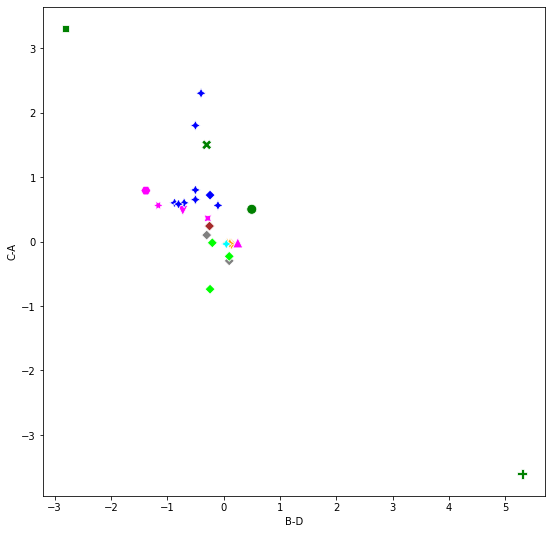

In [52]:
import seaborn as sns
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(9, 9))

p = sns.scatterplot(data=df, x="B-D", y="C-A", c=df["col_paper"], style=ID_markers, ax=ax, s=100)
sns.move_legend(p, bbox_to_anchor=(1, 1.02), loc='upper left')

ax.axhline(0, c='black') ; plt.axvline(0,c='black')
ax.set(xlabel=r"$B-D$", ylabel=r"$C-A$")

handles, labels = plt.gca().get_legend_handles_labels()
by_label = dict(zip(labels, handles))
markers = [plt.Line2D([0,0],[0,0],color=color, marker='o', linestyle='') for color in paper_dict.values()]
plt.legend(markers, paper_dict.keys(), numpoints=1)
#plt.legend(by_label.values(), by_label.keys())

fig.savefig("Experimental_CA_BD.png", dpi=200)

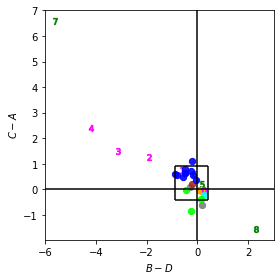

In [53]:
import seaborn as sns
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(4,4))
for i in ID:
    row = df.query(f'index=={i}')
    plt.scatter(x=row["b-d"], y=row["c-a"], 
                c=row["col_paper"], marker=f'{row["ID_markers"].to_string(index=False)}', alpha=0.9,s=40)
    #print(row["ID_markers"].to_string(index=False))
ax.axhline(0, c='black') ; ax.axvline(0,c='black')
ax.set(xlabel=r"$B-D$", ylabel=r"$C-A$")
plt.hlines(-0.4,xmin=-0.9,xmax=0.4, color='black')
plt.hlines(0.9,xmin=-0.9,xmax=0.4, color='black')
plt.vlines(-0.9,ymin=-0.4,ymax=0.9, color='black')
plt.vlines(0.4,ymin=-0.4,ymax=0.9, color='black')

#markers = [plt.Line2D([0,0],[0,0],color=color, marker='o', linestyle='') for color in paper_dict.values()]
plt.xlim(-6,3)
#sns.move_legend(p, loc='upper right')
leg = plt.legend(markers, paper_dict.keys(), numpoints=1)
leg.get_frame().set_alpha(0)
leg.remove()
#plt.legend(by_label.values(), by_label.keys())
plt.tight_layout()
fig.savefig("Experimental_ca_bd.png", dpi=350)

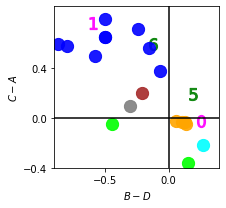

In [54]:
import seaborn as sns
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(3, 3))
for i in ID:
    row = df.query(f'index=={i}')
    plt.scatter(x=row["b-d"], y=row["c-a"], 
                c=row["col_paper"], marker=f'{row["ID_markers"].to_string(index=False)}', alpha=0.9,s=150)
    #print(row["ID_markers"].to_string(index=False))
ax.axhline(0, c='black') ; ax.axvline(0,c='black')
ax.set(xlabel=r"$B-D$", ylabel=r"$C-A$")


#markers = [plt.Line2D([0,0],[0,0],color=color, marker='o', linestyle='') for color in paper_dict.values()]

#sns.move_legend(p, loc='upper right')
leg = plt.legend(markers, paper_dict.keys(), numpoints=1)
leg.get_frame().set_alpha(0)
leg.remove()
#plt.legend(by_label.values(), by_label.keys())
plt.tight_layout()
plt.xlim(-0.9,0.4)
plt.yticks([-0.4,0,0.4])
plt.ylim(-0.4,0.9)
fig.savefig("Experimental_ca_bd_zoom.png", dpi=350)

ValueError: 0       green
1       green
2       green
3       green
4      orange
5      orange
6      orange
7      orange
8     magenta
9     magenta
10    magenta
11    magenta
12    magenta
13       gray
14       gray
15      brown
17       cyan
18       blue
19       blue
20       blue
21       blue
22       blue
23       blue
24       blue
25       blue
26       blue
27       blue
29       lime
30       lime
31       lime
Name: col_paper, dtype: object is not a valid value for color

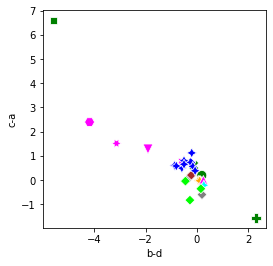

In [20]:
import seaborn as sns
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(4, 4))

p = sns.scatterplot(data=df, x="b-d", y="c-a", c=df["col_paper"], style=ID_markers, ax=ax, s=100)
sns.move_legend(p, bbox_to_anchor=(1, 1.02), loc='upper left')

ax.axhline(0, c='black') ; plt.axvline(0,c='black')
ax.set(xlabel=r"$b-d$", ylabel=r"$c-a$")


markers = [plt.Line2D([0,0],[0,0],color=color, marker='o', linestyle='') for color in paper_dict.values()]
plt.legend(markers, paper_dict.keys(), numpoints=1)
#plt.legend(by_label.values(), by_label.keys())

fig.savefig("Experimental_bd_ca.png", dpi=200)

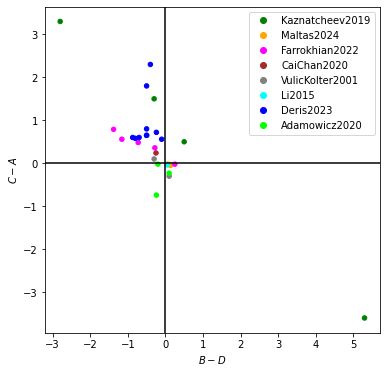

In [60]:
df.plot.scatter(x="B-D", y="C-A", c="col_paper",figsize=(6, 6))
plt.axhline(0, c='black') ; plt.axvline(0,c='black')
plt.xlabel(r"$B-D$")
plt.ylabel(r"$C-A$")

markers = [plt.Line2D([0,0],[0,0],color=color, marker='o', linestyle='') for color in paper_dict.values()]
plt.legend(markers, paper_dict.keys(), numpoints=1)
#plt.legend(by_label.values(), by_label.keys())

plt.savefig("Experimental_CA_BD.png", dpi=500)


ValueError: 0       green
1       green
2       green
3       green
4      orange
5      orange
6      orange
7      orange
8     magenta
9     magenta
10    magenta
11    magenta
12    magenta
13       gray
14       gray
15      brown
17       cyan
18       blue
19       blue
20       blue
21       blue
22       blue
23       blue
24       blue
25       blue
26       blue
27       blue
29       lime
30       lime
31       lime
Name: col_paper, dtype: object is not a valid value for color

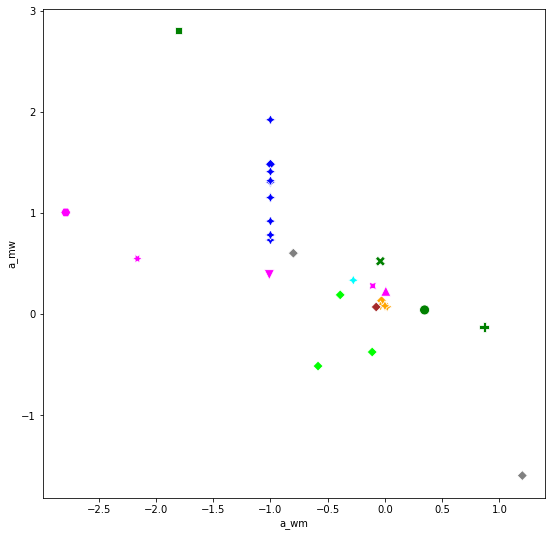

In [22]:
import seaborn as sns
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(9, 9))

p = sns.scatterplot(data=df, x="a_wm", y="a_mw", c=df["col_paper"], style=ID_markers, ax=ax, s=100)
sns.move_legend(p, bbox_to_anchor=(1, 1.02), loc='upper left')

ax.axhline(0, c='black') ; plt.axvline(0,c='black')
ax.set_xlabel(r"$\alpha_{wm}$", fontsize=20) 
ax.set_ylabel(r"$\alpha_{mw}$", fontsize=20)


markers = [plt.Line2D([0,0],[0,0],color=color, marker='o', linestyle='') for color in paper_dict.values()]
plt.legend(markers, paper_dict.keys(), numpoints=1)
#plt.legend(by_label.values(), by_label.keys())

fig.savefig("Experimental_awm_amw.png", dpi=400)

ValueError: 0       green
1       green
2       green
3       green
4      orange
5      orange
6      orange
7      orange
8     magenta
9     magenta
10    magenta
11    magenta
12    magenta
13       gray
14       gray
15      brown
17       cyan
18       blue
19       blue
20       blue
21       blue
22       blue
23       blue
24       blue
25       blue
26       blue
27       blue
29       lime
30       lime
31       lime
Name: col_paper, dtype: object is not a valid value for color

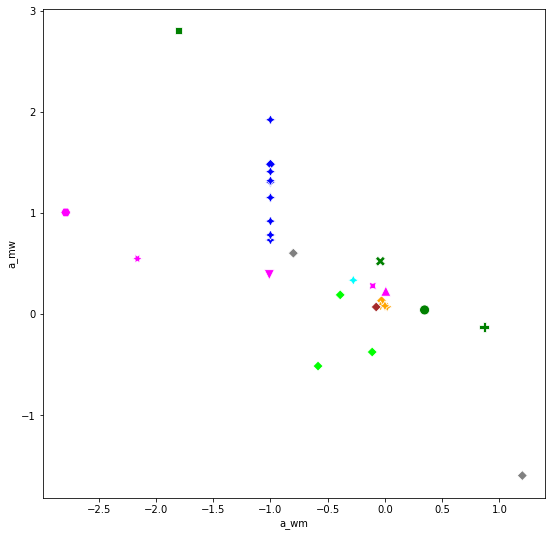

In [23]:
import seaborn as sns
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(9, 9))

p = sns.scatterplot(data=df, x="a_wm", y="a_mw", c=df["col_paper"], style=ID_markers, ax=ax, s=100)
sns.move_legend(p, bbox_to_anchor=(1, 1.02), loc='upper left')

ax.axhline(0, c='black') ; plt.axvline(0,c='black')
ax.set_xlabel(r"$\alpha_{wm}$", fontsize=20) 
ax.set_ylabel(r"$\alpha_{mw}$", fontsize=20)


markers = [plt.Line2D([0,0],[0,0],color=color, marker='o', linestyle='') for color in paper_dict.values()]
plt.legend(markers, paper_dict.keys(), numpoints=1)
#plt.legend(by_label.values(), by_label.keys())

fig.savefig("Experimental_awms_amws.png", dpi=400)

ValueError: 4      orange
5      orange
6      orange
7      orange
8     magenta
9     magenta
10    magenta
11    magenta
12    magenta
Name: col_paper, dtype: object is not a valid value for color

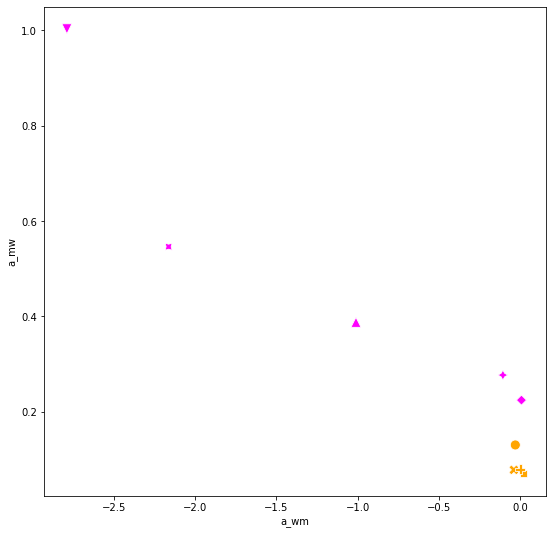

In [25]:
import seaborn as sns
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(9, 9))

p = sns.scatterplot(data=scott_df, x="a_wm", y="a_mw", c=scott_df["col_paper"], style=scott_df["Condition"], ax=ax, s=100)
sns.move_legend(p, bbox_to_anchor=(1, 1.02), loc='upper left')

ax.axhline(0, c='black') ; plt.axvline(0,c='black')
ax.set_xlabel(r"$\alpha_{wm}$", fontsize=20) 
ax.set_ylabel(r"$\alpha_{mw}$", fontsize=20)


markers = [plt.Line2D([0,0],[0,0],color=color, marker='o', linestyle='') for color in scott_dict.values()]
#plt.legend(markers, paper_dict.keys(), numpoints=1)
#plt.legend(by_label.values(), by_label.keys())

fig.savefig("Scott_only_awm_amw.png", dpi=400)

/var/folders/sl/s42h4v1x3lb1wkpyy7b8gsw80000gn/T/ipykernel_48449/1804730451.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['abs_awm_s'] = abs(df2['awm_s'])
/var/folders/sl/s42h4v1x3lb1wkpyy7b8gsw80000gn/T/ipykernel_48449/1804730451.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['abs_amw_s'] = abs(df2['amw_s'])


ValueError: 0       green
1       green
2       green
3       green
4      orange
5      orange
6      orange
7      orange
8     magenta
9     magenta
10    magenta
11    magenta
12    magenta
13       gray
14       gray
15      brown
17       cyan
29       lime
30       lime
31       lime
Name: col_paper, dtype: object is not a valid value for color

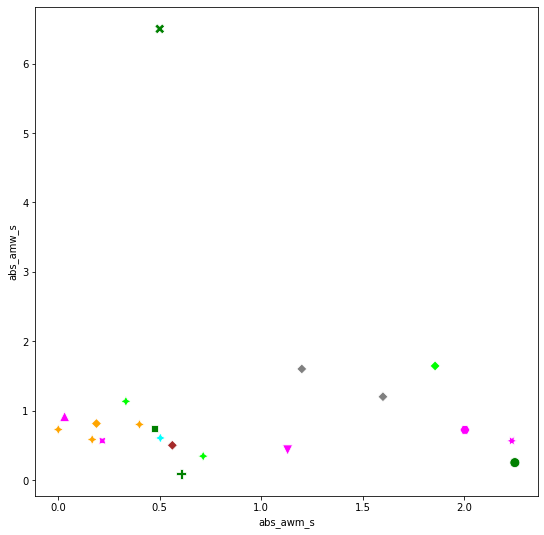

In [26]:
fig, ax = plt.subplots(figsize=(9, 9))
df2 = df.query('paper != "Deris2023"')
df2['abs_awm_s'] = abs(df2['awm_s'])
df2['abs_amw_s'] = abs(df2['amw_s'])
p = sns.scatterplot(data=df2, x="abs_awm_s", y="abs_amw_s", c=df2["col_paper"], style=ID_markers[0:20], ax=ax, s=100)
sns.move_legend(p, bbox_to_anchor=(1, 1.02), loc='upper left')

ax.axhline(0, c='black') ; plt.axvline(0,c='black')
ax.set_xlabel(r"$|\frac{\alpha_{wm}}{s_m}|$", fontsize=30)
ax.set_ylabel(r"$|\frac{\alpha_{mw}}{s_m}|$",fontsize=30)

markers = [plt.Line2D([0,0],[0,0],color=color, marker='o', linestyle='') for color in paper_dict.values()]
plt.legend(markers, paper_dict.keys(), numpoints=1)
#plt.legend(by_label.values(), by_label.keys())

fig.savefig("Absolute_Experimental_awms_amws.png", dpi=400)

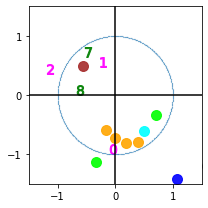

In [61]:
fig, ax = plt.subplots(figsize=(3, 3))

for i in ID:
    row = df.query(f'index=={i}')
    plt.scatter(x=row["awm_s"], y=row["amw_s"], 
                c=row["col_paper"], marker=f'{row["ID_markers"].to_string(index=False)}', alpha=0.9,s=100)

ax.axhline(0, c='black') ; plt.axvline(0,c='black')
ax.set_xlabel('')#(r"$\alpha_{wms}$")#, fontsize=25)
ax.set_ylabel('')#(r"$\alpha_{mws}$")#,fontsize=25)

markers = [plt.Line2D([0,0],[0,0],color=color, marker='o', linestyle='') for color in paper_dict.values()]
plt.legend(markers, paper_dict.keys(), numpoints=1)
#plt.legend(by_label.values(), by_label.keys())


theta = np.linspace(0, 360, num=1000)
xcirc = np.sin(theta)
ycirc = np.cos(theta)
plt.scatter(xcirc, ycirc, label='circle', s=0.01)
plt.tight_layout()

plt.xlim(-2,2)
plt.ylim(-2,2)

plt.xlim(-1.5,1.5)
plt.yticks([-1,0,1])
plt.xticks([-1,0,1])
plt.ylim(-1.5,1.5)

leg = plt.legend(markers, paper_dict.keys(), numpoints=1)
leg.remove()

fig.savefig("Experimental_awms_amws_nolegendzoom.png", dpi=350)

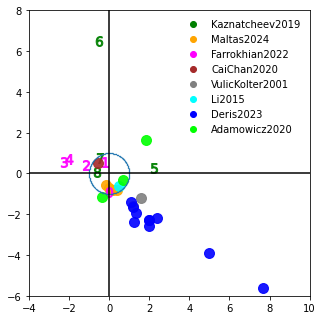

In [62]:
fig, ax = plt.subplots(figsize=(4.5, 4.5))

for i in ID:
    row = df.query(f'index=={i}')
    plt.scatter(x=row["awm_s"], y=row["amw_s"], 
                c=row["col_paper"], marker=f'{row["ID_markers"].to_string(index=False)}', alpha=0.9,s=100)

ax.axhline(0, c='black') ; plt.axvline(0,c='black')
ax.set_xlabel('')#(r"$\alpha_{wms}$")#, fontsize=25)
ax.set_ylabel('')#(r"$\alpha_{mws}$")#,fontsize=25)

markers = [plt.Line2D([0,0],[0,0],color=color, marker='o', linestyle='') for color in paper_dict.values()]
plt.legend(markers, paper_dict.keys(), numpoints=1)
#plt.legend(by_label.values(), by_label.keys())


theta = np.linspace(0, 360, num=1000)
xcirc = np.sin(theta)
ycirc = np.cos(theta)
plt.scatter(xcirc, ycirc, label='circle', s=0.01)
plt.tight_layout()

plt.xlim(-4,10)
plt.ylim(-6,8)

leg = plt.legend(markers, paper_dict.keys(), numpoints=1)
leg.get_frame().set_alpha(0)

fig.savefig("Experimental_awms_amws_legend.png", dpi=350)

ValueError: 4      orange
5      orange
6      orange
7      orange
8     magenta
9     magenta
10    magenta
11    magenta
12    magenta
Name: col_paper, dtype: object is not a valid value for color

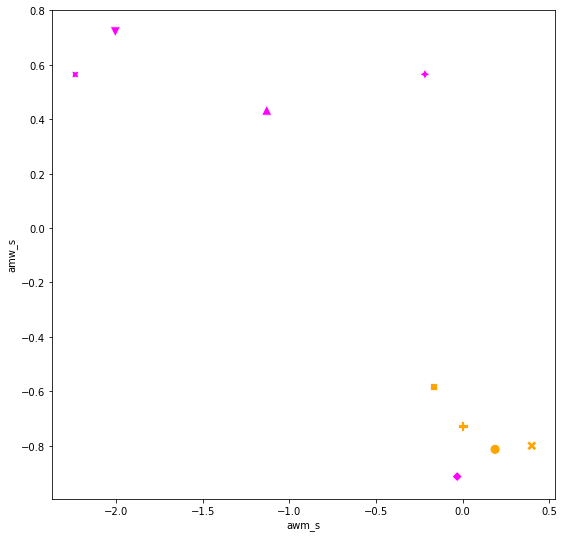

In [28]:
fig, ax = plt.subplots(figsize=(9, 9))

p = sns.scatterplot(data=scott_df, x="awm_s", y="amw_s", c=scott_df["col_paper"], style=scott_df["Condition"], ax=ax, s=100)
sns.move_legend(p, bbox_to_anchor=(1, 1.02), loc='upper left')

ax.axhline(0, c='black') ; plt.axvline(0,c='black')
ax.set_xlabel(r"$\frac{\alpha_{wm}}{s_m}$", fontsize=30)
ax.set_ylabel(r"$\frac{\alpha_{mw}}{s_m}$",fontsize=30)

markers = [plt.Line2D([0,0],[0,0],color=color, marker='o', linestyle='') for color in paper_dict.values()]
#plt.legend(markers, scott_dict.keys(), numpoints=1)
#plt.legend(by_label.values(), by_label.keys())

fig.savefig("Scott_only_awms_amws.png", dpi=400)

ValueError: 0       green
1       green
2       green
3       green
4      orange
5      orange
6      orange
7      orange
8     magenta
9     magenta
10    magenta
11    magenta
12    magenta
13       gray
14       gray
15      brown
17       cyan
18       blue
19       blue
20       blue
21       blue
22       blue
23       blue
24       blue
25       blue
26       blue
27       blue
29       lime
30       lime
31       lime
Name: col_paper, dtype: object is not a valid value for color

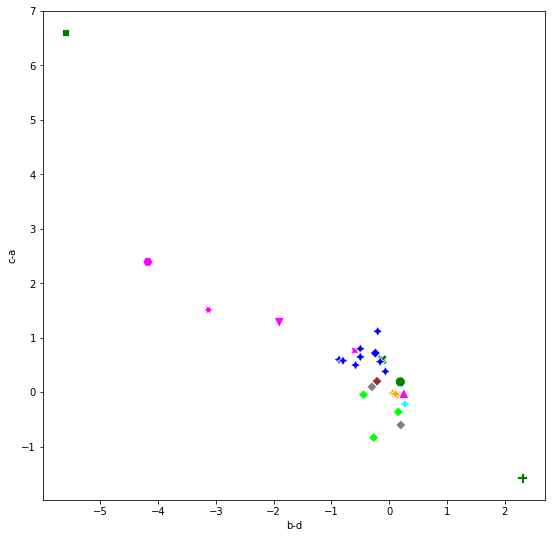

In [29]:
import seaborn as sns
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(9, 9))

p = sns.scatterplot(data=df, x="b-d", y="c-a", c=df["col_paper"], style=ID_markers, ax=ax, s=100)
sns.move_legend(p, bbox_to_anchor=(1, 1.02), loc='upper left')

ax.axhline(0, c='black') ; plt.axvline(0,c='black')
#fig.set_axis_labels(r"$B-D$", r"$C-A$")


markers = [plt.Line2D([0,0],[0,0],color=color, marker='o', linestyle='') for color in paper_dict.values()]
plt.legend(markers, paper_dict.keys(), numpoints=1)
#plt.legend(by_label.values(), by_label.keys())

fig.savefig("Experimental_CA_BD.png", dpi=200)

ValueError: 0       green
1       green
2       green
3       green
4      orange
5      orange
6      orange
7      orange
8     magenta
9     magenta
10    magenta
11    magenta
12    magenta
13       gray
14       gray
15      brown
17       cyan
18       blue
19       blue
20       blue
21       blue
22       blue
23       blue
24       blue
25       blue
26       blue
27       blue
29       lime
30       lime
31       lime
Name: col_paper, dtype: object is not a valid value for color

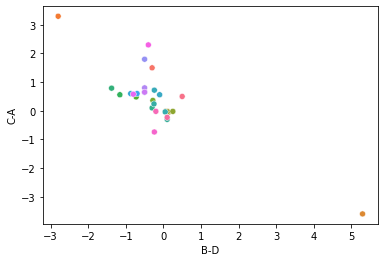

In [30]:
import seaborn as sns
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(6, 4))

p = sns.scatterplot(data=df, x="B-D", y="C-A", c=df["col_paper"], hue=ID,ax=ax)
sns.move_legend(p, bbox_to_anchor=(1, 1.02), loc='upper left')

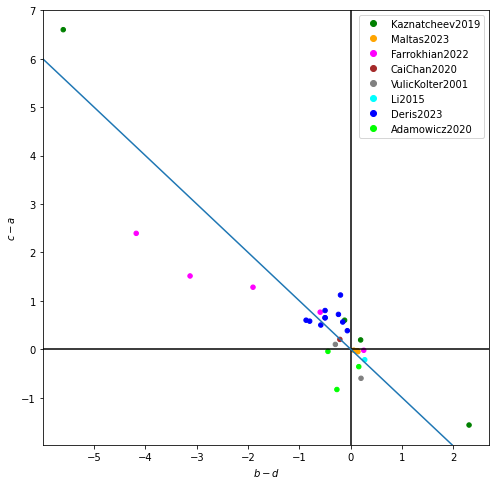

In [31]:
df.plot.scatter(x="b-d", y="c-a", c="col_paper",figsize=(8, 8))
plt.axhline(0, c='black') ; plt.axvline(0,c='black')
plt.xlabel(r"$b-d$")
plt.ylabel(r"$c-a$")

plt.axline((0, 0), slope=-1)
markers = [plt.Line2D([0,0],[0,0],color=color, marker='o', linestyle='') for color in paper_dict.values()]
plt.legend(markers, paper_dict.keys(), numpoints=1)
#plt.legend(by_label.values(), by_label.keys())

plt.savefig("Experimental_ca_bd.png", dpi=200)


In [32]:
amw = np.linspace(-3, 3.2, 100) #a_mw
amw_mask = np.linspace(-4.5, 1.1, 100) #a_mw
awm_neg = np.linspace(-6, 3, 50) #a_mw
s_pos = np.linspace(0.01,3,50)
s_neg = np.linspace(-3,0.01,50)

# Mirroring
awm_mi = amw 
amw_mi = -2*awm_mi/(awm_mi+1)

#Masking

#a_wm/s = a_mw/s + 2
awm = amw_mask + 2





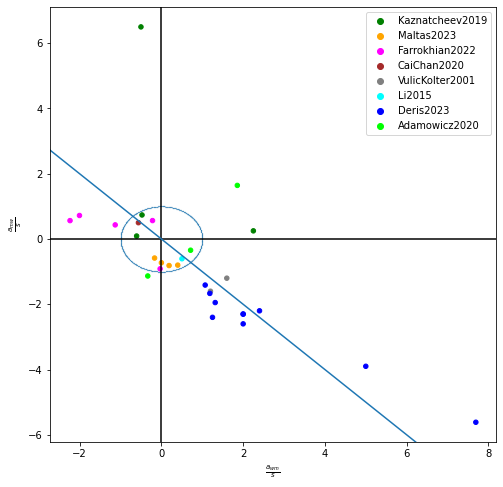

In [33]:
df.plot.scatter(x="awm_s", y="amw_s", c="col_paper",figsize=(8, 8))
plt.axhline(0, c='black') ; plt.axvline(0,c='black')
plt.xlabel(r"$\frac{a_{wm}}{s}$")
plt.ylabel(r"$\frac{a_{mw}}{s}$")


theta = np.linspace(0, 360, num=1000)
xcirc = np.sin(theta)
ycirc = np.cos(theta)
plt.scatter(xcirc, ycirc, label='circle', s=0.01)

plt.axline((0, 0), slope=-1)
markers = [plt.Line2D([0,0],[0,0],color=color, marker='o', linestyle='') for color in paper_dict.values()]
plt.legend(markers, paper_dict.keys(), numpoints=1)
#plt.legend(by_label.values(), by_label.keys())

plt.savefig("Experimental_awms_amws.png", dpi=200)



In [81]:
plt.close()

In [80]:
mu=0.01
df['mask_awm']= df["a_mw"]+2*df['S']
df['mirror'] = df['S']*(2+df['S'])
df['maintain_awm']=df['a_mw']*mu/(df['S']*(1+df['S']))
df['maintain_awm']=-df['a_wm']*df['S']/(mu*(1+df['S']))

In [130]:
df[["paper","A","B","C","D", "S","a_wm",'a_mw']].to_csv("paper_vals.csv")

awm_mt_s1

<Figure size 360x288 with 0 Axes>

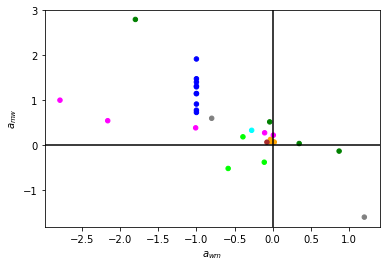

In [83]:
x = np.linspace(-3, 3, 50)
#y = x -2*s5
#y2 = x + 2*s1

plt.figure(figsize=(5, 4))
df.plot.scatter(x="a_wm", y="a_mw", c="col_paper")
plt.axhline(0, c='black') ; plt.axvline(0,c='black')
#plt.plot(awm_mt_pos, amw, 'y', lw=2, label ='s>0')
#plt.plot(amw, awm_mt_neg, 'r', lw=2, label ='s<0')
#plt.plot(y2, x, 'b', lw=2, label ='s<0')
#plt.plot(awm_mimic[0:15], amw[0:15],'b',lw=2, label ='s<0')
#plt.plot(awm_mimic[20:50], amw[20:50],'b',lw=2, label ='s<0')

plt.xlabel(r"$a_{wm}$")
plt.ylabel(r"$a_{mw}$")
plt.savefig("Experimental.png")

#plt.legend()

## Shortest distance between points and surface

In [84]:
# Distance
# Let the co-ordinate of the given point be (x1, y1, z1) 
# and equation of the plane be given by the equation a * x + b * y + c * z + d = 0,

import math
 
# Function to find distance from a plane
def shortest_distance(x1, y1, z1, a, b, c, d): 
     
    d = abs((a * x1 + b * y1 + c * z1 + d)) 
    e = (math.sqrt(a * a + b * b + c * c))
    print("Perpendicular distance is \n", d/e)
    return(d/e)
     

# Define the distance function to minimize
def distance_function(xyz, point):
    x, y, z = xyz
    x0, y0, z0 = point
    return ((x - x0)**2 + (y - y0)**2 + (z - z0)**2)

In [85]:
from scipy.optimize import minimize
import numpy as np

### Maintenance
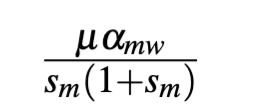

In [86]:
# Define the surface equation (example: a sphere)
def surface_equation(xyz):
    x, y, z = xyz
    return  (mu*y/(x*(1+x)) - z) # Maintenance

maint_dists = []
for i in df['S'].index:
    x1 = df['S'][i]
    y1 = df['a_mw'][i]
    z1 = df['a_wm'][i]

    # Point coordinates
    point = (x1, y1, z1)

    # Initial guess for the optimizer
    initial_guess = np.array([0.2, -0.1, 0.1])

    # Constraint for the surface equation F(x, y, z) = 0
    surface_constraint = {'type': 'eq', 'fun': surface_equation}

    # Minimize the distance function subject to the surface constraint
    result = minimize(distance_function, initial_guess, args=(point,), constraints=surface_constraint)

    # The optimized point is the projection of the original point onto the surface
    closest_point_on_surface = result.x

    # Calculate the distance between the original point and its projection
    distance = np.sqrt(result.fun)
    maint_dists.append(distance)

    print("Closest point on surface:", closest_point_on_surface)
    print("Distance to surface:", distance)

Closest point on surface: [0.14418894 0.05928033 0.0035932 ]
Distance to surface: 0.3433709607454978
Closest point on surface: [0.11252556 0.51353061 0.04102089]
Distance to surface: 0.08754512766346295
Closest point on surface: [3.80073716e+00 2.79865814e+00 1.53381748e-03]
Distance to surface: 1.8015344680389387
Closest point on surface: [-1.43962466 -0.11667685 -0.00184354]
Distance to surface: 0.8715649431315925
Closest point on surface: [-0.15897781  0.1315026  -0.00983536]
Distance to surface: 0.02024636397510327
Closest point on surface: [-0.09444619  0.08112044 -0.00948488]
Distance to surface: 0.02963305985326297
Closest point on surface: [-0.12115167  0.06750995 -0.00634053]
Distance to surface: 0.02648302263130649
Closest point on surface: [-0.10939901  0.07836462 -0.00804311]
Distance to surface: 0.008101755302985361
Closest point on surface: [-0.24621597  0.22312235 -0.01202211]
Distance to surface: 0.019759304095890794
Closest point on surface: [0.49096915 0.27517375 0.00

### Masking
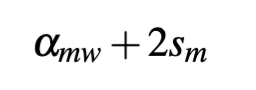

In [90]:
#0=y+2x-z
# Plane
a = 2
b = +1
c = -1
d = 0

# Coord
x1 = df['S']
y1 = df['a_mw']
z1 = df['a_wm']

 
# Function call

mask_dists =shortest_distance(x1,y1,z1, a, b, c, d) 


Perpendicular distance is 
 0     0.000041
1     0.293939
2     4.980629
3     1.579758
4     0.065320
5     0.031721
6     0.077567
7     0.056583
8     0.112105
9     0.555953
10    1.300312
11    1.895619
12    2.683294
13    0.163299
14    0.326599
15    0.169546
17    0.199838
18    0.391918
19    0.538888
20    0.600125
21    0.442255
22    0.469486
23    0.293408
24    0.530723
25    0.469486
26    0.563383
27    0.183753
29    0.229354
30    0.163258
31    0.210534
dtype: float64


### Mirroring
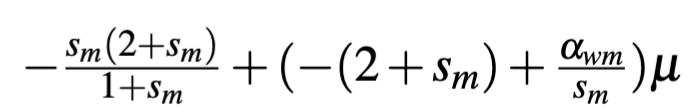

In [91]:
# Define the surface equation 
def surface_equation(xyz):
    x, y, z = xyz
    return  (-(x*(2+x)/(1+x)) + mu*(-(2+x)+y/x) - z) # Mirror


mirror_dists = []
for i in df['S'].index:
    x1 = df['S'][i]
    y1 = df['a_mw'][i]
    z1 = df['a_wm'][i]

    # Point coordinates
    point = (x1, y1, z1)

    # Initial guess for the optimizer
    initial_guess = np.array([0.2, .1, .1])

    # Constraint for the surface equation F(x, y, z) = 0
    surface_constraint = {'type': 'eq', 'fun': surface_equation}

    # Minimize the distance function subject to the surface constraint
    result = minimize(distance_function, initial_guess, args=(point,), constraints=surface_constraint)

    # The optimized point is the projection of the original point onto the surface
    closest_point_on_surface = result.x

    # Calculate the distance between the original point and its projection
    distance = np.sqrt(result.fun)
    mirror_dists.append(distance)

    print("Closest point on surface:", closest_point_on_surface)
    print("Distance to surface:", distance)

Closest point on surface: [-0.11734654  0.028516    0.2290374 ]
Distance to surface: 0.29554559806172287
Closest point on surface: [ 0.0587751   0.52106108 -0.04622182]
Distance to surface: 0.02214347518058455
Closest point on surface: [ 2.36550189  2.80551228 -3.10016429]
Distance to surface: 1.9360378132041818
Closest point on surface: [-0.41867853 -0.12423389  1.12605089]
Distance to surface: 1.0480018745591455
Closest point on surface: [-0.03405465  0.14120752  0.00818553]
Distance to surface: 0.13208320770234658
Closest point on surface: [-0.02064337  0.08675873 -0.02009907]
Distance to surface: 0.07923004971021781
Closest point on surface: [-0.04300786  0.07665177  0.05055587]
Distance to surface: 0.08310052153290454
Closest point on surface: [-0.03487292  0.08678931  0.02646731]
Distance to surface: 0.0789818023716207
Closest point on surface: [-0.06325092  0.23463114  0.07430985]
Distance to surface: 0.19432577434857712
Closest point on surface: [ 0.15134136  0.28842203 -0.2852

In [92]:
df['mask_dist']=mask_dists
df['maint_dist']=maint_dists
df['mirror_dist']=mirror_dists

In [93]:
df['closest_mirror'] = (df['mirror_dist']<df['mask_dist']) &(df['mirror_dist']<df['maint_dist'] )
df['closest_mask'] = (df['mirror_dist']>df['mask_dist']) &(df['mask_dist']<df['maint_dist'] )
df['closest_maintain'] = (df['mirror_dist']>df['maint_dist']) &(df['mask_dist']>df['maint_dist'] )

In [106]:
df.query("closest_mirror==True")[['Paper','mirror_dist','Ap','Bp','Cp','Dp']]

,Paper,mirror_dist,Ap,Bp,Cp,Dp
1,Kaznatcheev2019,0.022143,1.0,0.9600,1.6000,1.0800
10,Farrokhian2022,0.229220,1.0,-0.0100,2.2812,1.8939
11,Farrokhian2022,0.427044,1.0,-1.1622,2.5135,1.9676
12,Farrokhian2022,0.513717,1.0,-1.7879,3.3939,2.3909


In [124]:
df['dmt_s']=df['maint_dist']/abs(df['S'])
df['dma_s']=df['mask_dist']/abs(df['S'])
df['dmi_s']=df['mirror_dist']/abs(df['S'])

In [127]:
df.query("closest_mask==True")[['Paper','S','dma_s','Ap','Bp','Cp','Dp']]

,Paper,S,dma_s,Ap,Bp,Cp,Dp
0,Kaznatcheev2019,0.1538,0.000265,1.0,1.3462,1.1923,1.1538
13,VulicKolter2001,-0.5000,0.326599,1.0,0.2000,1.1000,0.5000
14,VulicKolter2001,1.0000,0.326599,1.0,2.2000,0.4000,2.0000
17,Li2015,-0.5490,0.364003,1.0,0.7238,0.7833,0.4510
18,Deris2023,-0.7600,0.515682,1.0,0.0000,1.7200,0.2400
19,Deris2023,-0.8000,0.673610,1.0,0.0000,2.1200,0.2000
20,Deris2023,-0.1300,4.616346,1.0,0.0000,1.6000,0.8700
21,Deris2023,-0.4167,1.061328,1.0,0.0000,1.5000,0.5833
22,Deris2023,-0.5000,0.938971,1.0,0.0000,1.6500,0.5000
23,Deris2023,-0.8438,0.347722,1.0,0.0000,1.5625,0.1563


In [94]:
import scipy as sp

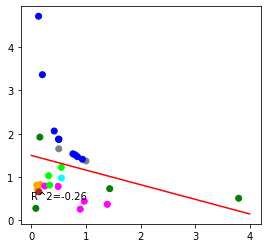

In [95]:
fig = plt.figure(figsize=(4.3,4))
ax = plt.axes()

df_filt = df#.query('closest_mirror')

#Mirror
plt.scatter(abs(np.array(df_filt['S'])), np.array(df_filt['mirror_dist'])/abs(np.array(df_filt['S'])), c=df_filt['col_paper'], label='mirror', )
#Regression

# Create sequence of 100 numbers from 0 to 100 
xseq = np.linspace(0, 4, num=100)


xp=abs(np.array(df_filt['S']))
yp=np.array(df_filt['mirror_dist'])/abs(np.array(df_filt['S']))
linreg = sp.stats.linregress(xp,yp)
#The regression line can then be added to your plot: -

x=np.linspace(0,4,12)
plt.plot(x, linreg.intercept + linreg.slope*x, 'r')
#Similarly the r-squared value: -

plt.text(0, 0.5, f'R^2={np.round(linreg.rvalue,2)}')

#plt.xscale('log')
#plt.yscale('log')
plt.savefig("Mirror_regression.png")

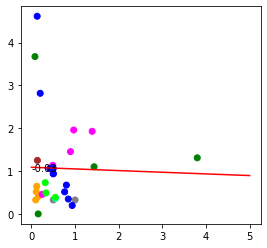

In [96]:
fig = plt.figure(figsize=(4.3,4))
ax = plt.axes()

df_filt = df#.query('closest_mask')

#Mirror
plt.scatter(abs(np.array(df_filt['S'])), np.array(df_filt['mask_dist'])/abs(np.array(df_filt['S'])), c=df_filt['col_paper'], label='mask', )
#Regression

# Create sequence of 100 numbers from 0 to 100 
xseq = np.linspace(0, 4, num=100)

#plt.xscale('log')
#plt.yscale('log')

import scipy as sp
xp=abs(np.array(df_filt['S']))
yp=np.array(df_filt['mask_dist'])/abs(np.array(df_filt['S']))
linreg = sp.stats.linregress(xp,yp)
#The regression line can then be added to your plot: -

x=np.linspace(0,5,10)
plt.plot(x, linreg.intercept + linreg.slope*x, 'r')
#Similarly the r-squared value: -

plt.text(0, 1, np.round(linreg.rvalue,2))

plt.savefig("Mask_regression.png")

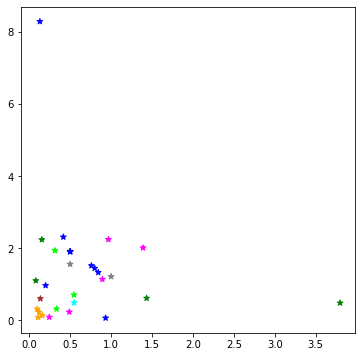

In [97]:
fig = plt.figure(figsize=(6,6))
ax = plt.axes()

#Maintain
plt.scatter(abs(np.array(df['S'])), np.array(df['maint_dist'])/abs(np.array(df['S'])), c=df['col_paper'],marker='*', label='maintain')

#plt.scatter(xcirc, -ycirc, label='circle', s=0.2)
#Regression
b, a = np.polyfit(abs(np.array(df['S'])), np.array(df['maint_dist']), deg=1)

# Create sequence of 100 numbers from 0 to 100 
xseq = np.linspace(0, 4, num=50)

#plt.xlim(-4,4)
#plt.ylim(-4,4)
#plt.yscale('log')
# Plot regression line
#plt.plot(xseq, a + b * xseq, color="k", lw=2.5);
plt.savefig("Maintain_regression.png", dpi=300)



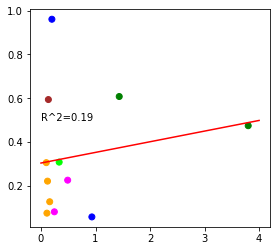

In [98]:
fig = plt.figure(figsize=(4.3,4))
ax = plt.axes()

df_filt = df.query('closest_maintain')

#Mirror
plt.scatter(abs(np.array(df_filt['S'])), np.array(df_filt['maint_dist'])/abs(np.array(df_filt['S'])), c=df_filt['col_paper'], label='mirror', )
#Regression

# Create sequence of 100 numbers from 0 to 100 
xseq = np.linspace(0, 4, num=100)

xp=abs(np.array(df_filt['S']))
yp=np.array(df_filt['maint_dist'])/abs(np.array(df_filt['S']))
linreg = sp.stats.linregress(xp,yp)
#The regression line can then be added to your plot: -

x=np.linspace(0,4,12)
plt.plot(x, linreg.intercept + linreg.slope*x, 'r')
#Similarly the r-squared value: -

plt.text(0, 0.5, f'R^2={np.round(linreg.rvalue,2)}')

#plt.xscale('log')
#plt.yscale('log')
plt.savefig("Main_regression.png")

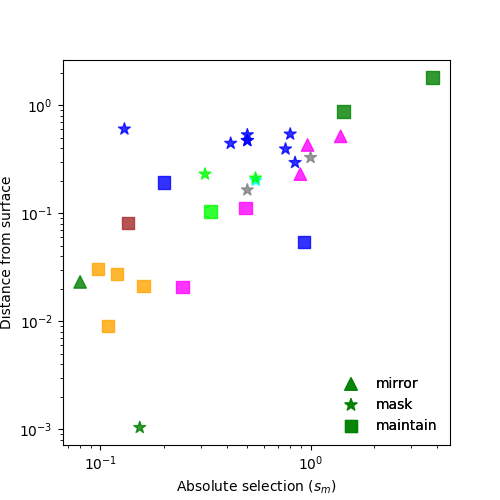

In [118]:
fig = plt.figure(figsize=(5,5))
ax = plt.axes()


#Mirror
df_filt = df.query('closest_mirror')
plt.scatter(abs(np.array(df_filt['S'])), np.array(df_filt['mirror_dist']+0.001), 
            c=df_filt['col_paper'],s=80, marker='^', label='mirror',alpha=0.8)
df_filt = df.query('closest_mask')
plt.scatter(abs(np.array(df_filt['S'])), np.array(df_filt['mask_dist']+0.001), 
            c=df_filt['col_paper'],s=80, marker='*', label='mask',alpha=0.8)
df_filt = df.query('closest_maintain')
plt.scatter(abs(np.array(df_filt['S'])), np.array(df_filt['maint_dist']+0.001), 
            c=df_filt['col_paper'],s=80, marker='s', label='maintain',alpha=0.8)
plt.xlabel("Absolute selection $(s_m)$")
plt.ylabel("Distance from surface")
plt.xscale('log')
plt.yscale('log')
legend1 = plt.legend(loc=4) 
legend1.get_frame().set_alpha(0)

#legend2 = plt.legend(markers, paper_dict.keys(), numpoints=1, title='Papers')
ax.add_artist(legend1)
#plt.hlines(y=1, xmin=0.01, xmax=10)
#plt.ylim(-1,9)
#plt.xlim(0.05,10)

plt.savefig('experimental_dist.png',dpi=350)

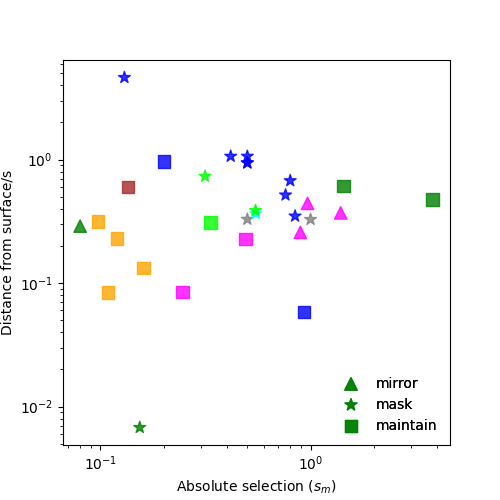

In [119]:
fig = plt.figure(figsize=(5,5))
ax = plt.axes()


#Mirror
df_filt = df.query('closest_mirror')
plt.scatter(abs(np.array(df_filt['S'])), np.array(df_filt['mirror_dist']+0.001)/abs(np.array(df_filt['S'])), 
            c=df_filt['col_paper'],s=80, marker='^', label='mirror',alpha=0.8)
df_filt = df.query('closest_mask')
plt.scatter(abs(np.array(df_filt['S'])), np.array(df_filt['mask_dist']+0.001)/abs(np.array(df_filt['S'])), 
            c=df_filt['col_paper'],s=80, marker='*', label='mask',alpha=0.8)
df_filt = df.query('closest_maintain')
plt.scatter(abs(np.array(df_filt['S'])), np.array(df_filt['maint_dist']+0.001)/abs(np.array(df_filt['S'])), 
            c=df_filt['col_paper'],s=80, marker='s', label='maintain',alpha=0.8)
plt.xlabel("Absolute selection $(s_m)$")
plt.ylabel("Distance from surface/s")
plt.xscale('log')
plt.yscale('log')
legend1 = plt.legend(loc=4) 
legend1.get_frame().set_alpha(0)

#legend2 = plt.legend(markers, paper_dict.keys(), numpoints=1, title='Papers')
ax.add_artist(legend1)
#plt.hlines(y=1, xmin=0.01, xmax=10)
#plt.ylim(-1,9)
#plt.xlim(0.05,10)

plt.savefig('experimental_dist.png',dpi=350)


### 3D plotting code (not used)


Other plotting code

Supplementary: Validations of MMMM 
\
Supplementary: Sims of Experiments 
\
Supplementary: Changing mutation for distances